# The Mobile Price Prediction
by [**dhruv-atreya**](https://github.com/dhruv-atreya)

A descriptive and predictive statistical analysis of Mobile Price dataset.

Starting with analysing of data, EDA and finally testing some Machine Learning Algorithms on this data namely,:
1. Decision Tree Algorithm
2. Gausian Naive Bayes Algorithm
3. k-Nearest Neighbour ALgorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
data_path = "https://raw.githubusercontent.com/dhruv-atreya/datasets/main/Mobile%20Price%20Classification/train.csv"

In [2]:
df = pd.read_csv(data_path)
#df = df.drop(columns="id")
#df.rename(columns={"Unnamed: 0" : "id"}, inplace=True)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
print(f"There are {len(df.columns.tolist())} columns")
df.columns.tolist()

There are 21 columns


['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

### Information about columns
1. battery_power :Total energy a battery can store in one time measured in mAh
2. clock_speed :The speed at which microprocessor executes 3 instructions
3. fc: Front Camera megapixels
4. int_memory :Internal Memory in Gigabytes
5. m_dep :Mobile Depth in cm
6. mobile_wt :Weight of the mobile phone
7. n_cores :Number of cores of a processor
8. pc :Primary Camera megapixels
9. px_height: Pixel Resolution Height
10. px_width: Pixel Resolution Width
11. ram :Random Access Memory in MegaBytes
12. sc_h :Screen Height of mobile in cm
13. sc_w :Screen Width of mobile in cm
14. talk_time: The longest time that a single battery charge will last when you are
15. price_range: This is the target variable with the value of (low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [4]:
df.shape

(2000, 21)

and 2000 rows

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

and there is not any missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

all values are numerical.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
df[(df["three_g"]==1) & (df["four_g"]==0)].shape

(480, 21)

There are 480 phones that are 3G.

In [9]:
df[(df["three_g"]==1) & (df["four_g"]==1)].shape

(1043, 21)

1043 phones that are both 3G and 4G.

In [10]:
df[(df["three_g"]==0) & (df["four_g"]==0)].shape

(477, 21)

And 477 phones that are not 3G or 4G.

## Exploratory Data Analysis
### Univariate Analysis
(for categorical data)

In [11]:
# Using my Univariate Analysis function
def univariate_cat(data,x):

    missing=data[x].isnull().sum()
    unique_count=data[x].nunique()
    unique_cat=list(data[x].unique())

    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:'count'},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'percentage'},inplace=True)
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%'
    ff=pd.concat([f1,f2],axis=1)

    print(f"Univariate analysis for {x} column")
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_count}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f'Value count and %\n:',ff)

    sns.countplot(data=data, x=x)
    plt.show()

Univariate analysis for price_range column
Total missing values : 0

Total count of unique categories: 4

Unique categories :
[1, 2, 3, 0]
Value count and %
:    count percentage
1    500      25.0%
2    500      25.0%
3    500      25.0%
0    500      25.0%


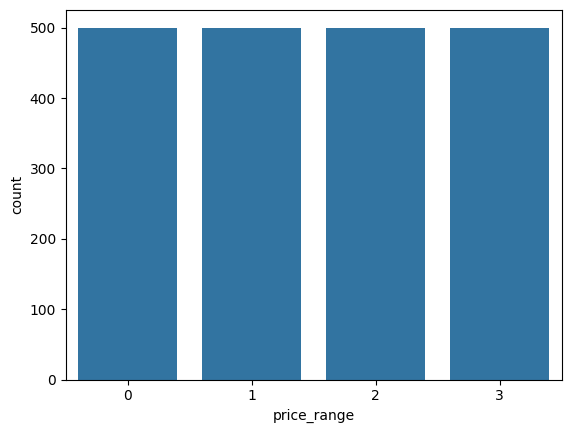

In [12]:
univariate_cat(df, x="price_range")

As we can see, the data is very equally distributed.

Let's see some other categorical columns.

Univariate analysis for dual_sim column
Total missing values : 0

Total count of unique categories: 2

Unique categories :
[0, 1]
Value count and %
:    count percentage
1   1019     50.95%
0    981     49.05%


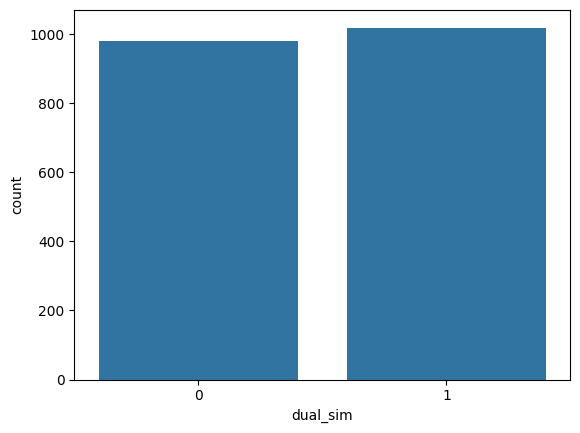

In [13]:
univariate_cat(df, x="dual_sim")

Univariate analysis for wifi column
Total missing values : 0

Total count of unique categories: 2

Unique categories :
[1, 0]
Value count and %
:    count percentage
1   1014      50.7%
0    986      49.3%


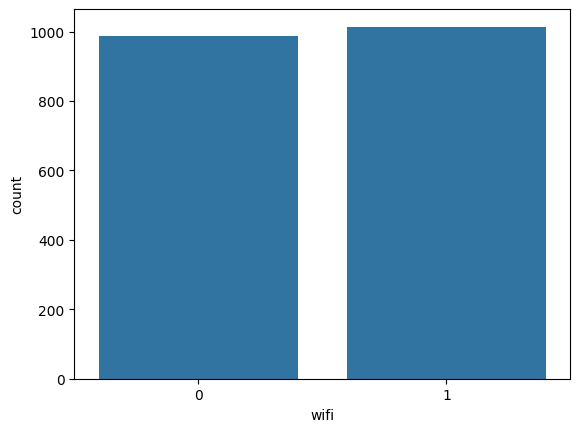

In [14]:
univariate_cat(df, x="wifi")

Most of the data is pretty balanced

### Univariate Analysis
(For numerical data)

In [15]:
# Using my Univariate Analysis function for numerical data
def univariate_num(data,x):

    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)

    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)

    desc={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1,
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}

    print(f"Univariate Analysis for {x} column")
    for key, value in desc.items():
      print(key,":", value)
    sns.histplot(data[x],kde=True)
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()

Univariate Analysis for sc_w column
missing : 0
min : 0
max : 18
mean : 5.77
var : 18.98
std : 4.36
range : 18
q1 : 2.0
q2 : 5.0
q3 : 9.0
skewness : 0.63
Kurtosis : -0.39


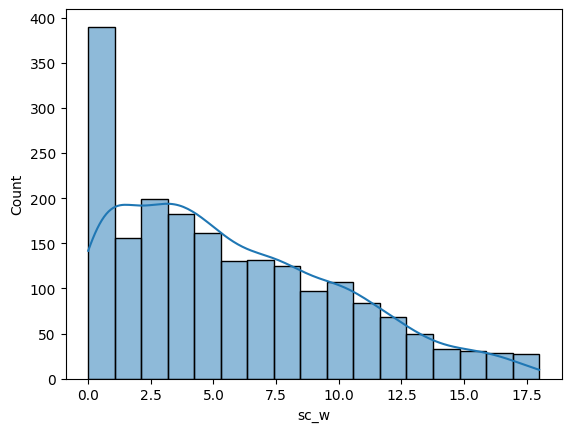

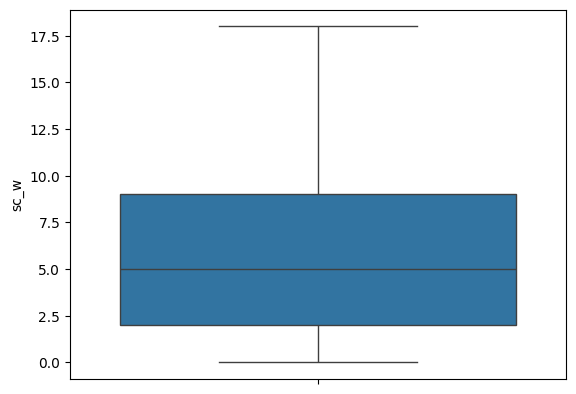

In [16]:
univariate_num(df, x="sc_w")

Some of the sc_w are 0, which is not possible.

In [17]:
df["sc_w"] = df["sc_w"].replace(0, np.nan)
df["sc_w"].isnull().sum()

180

There are 180 instances, lets keep them this way for now.

Univariate Analysis for sc_w column
missing : 180
min : 1.0
max : 18.0
mean : 6.34
var : 17.24
std : 4.15
range : 17.0
q1 : 3.0
q2 : 6.0
q3 : 9.0
skewness : 0.65
Kurtosis : -0.37


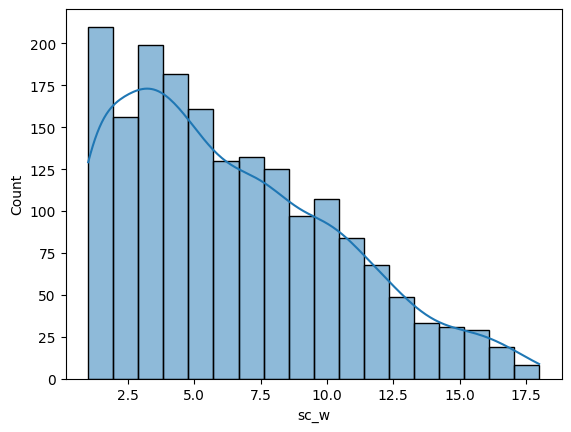

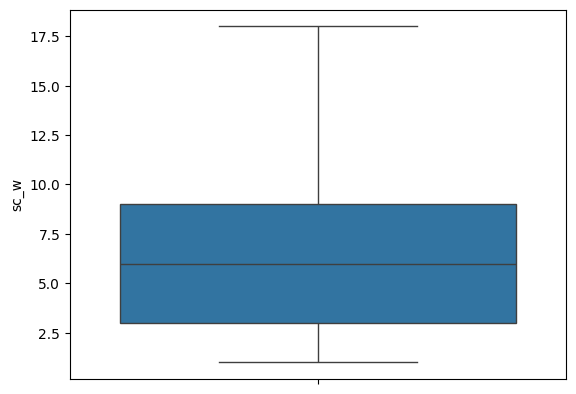

In [18]:
univariate_num(df, x="sc_w")

Univariate Analysis for sc_h column
missing : 0
min : 5
max : 19
mean : 12.31
var : 17.75
std : 4.21
range : 14
q1 : 9.0
q2 : 12.0
q3 : 16.0
skewness : -0.1
Kurtosis : -1.19


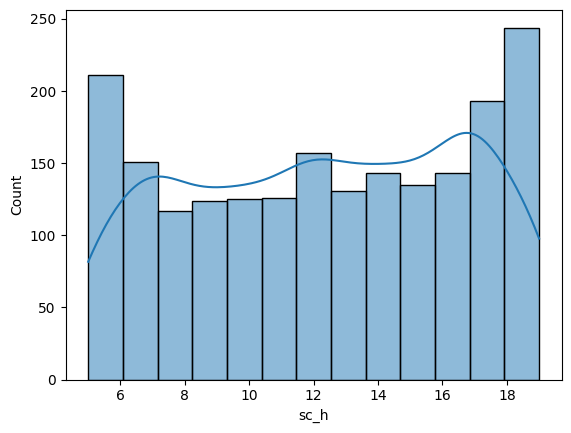

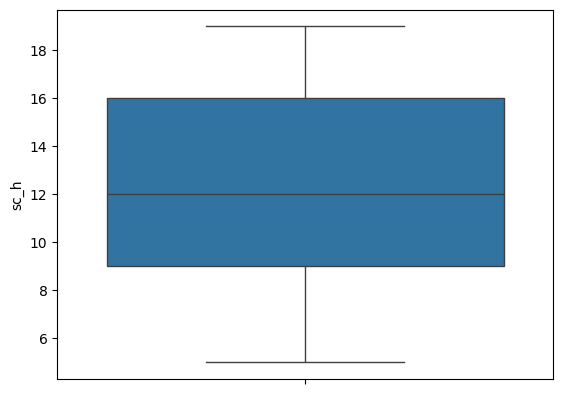

In [19]:
univariate_num(df,x="sc_h")

Univariate Analysis for px_height column
missing : 0
min : 0
max : 1960
mean : 645.11
var : 196941.41
std : 443.78
range : 1960
q1 : 282.75
q2 : 564.0
q3 : 947.25
skewness : 0.67
Kurtosis : -0.32


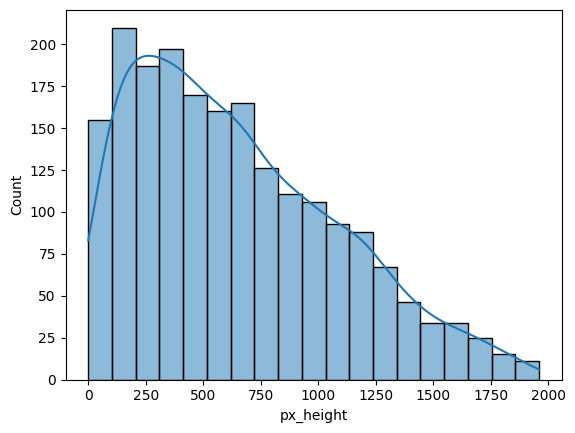

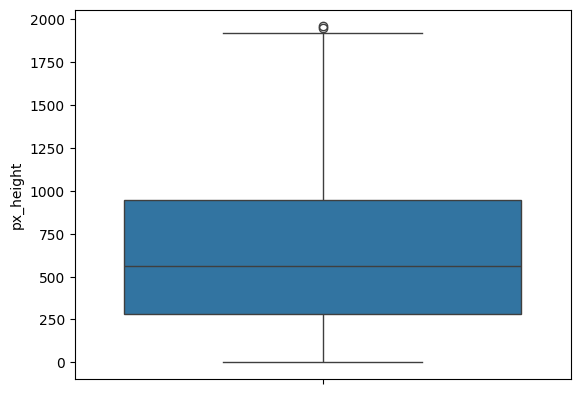

In [20]:
univariate_num(df,x="px_height")

px_height also can't be 0.

In [21]:
df[df['px_height']==0].shape

(2, 21)

there are only 2 instances, let's treat them too.

In [22]:
df["px_height"]=df["px_height"].replace(0,np.nan)

Univariate Analysis for px_height column
missing : 2
min : 1.0
max : 1960.0
mean : 645.75
var : 196721.44
std : 443.53
range : 1959.0
q1 : 284.0
q2 : 565.5
q3 : 947.75
skewness : 0.67
Kurtosis : -0.32


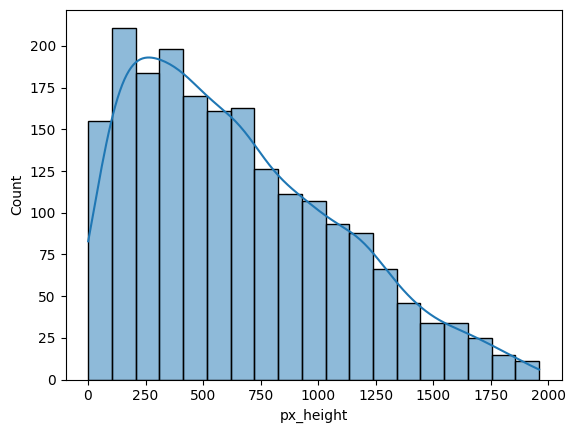

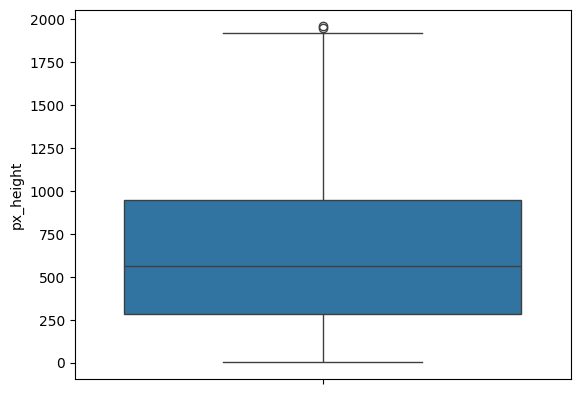

In [23]:
univariate_num(df,x="px_height")

Univariate Analysis for px_width column
missing : 0
min : 500
max : 1998
mean : 1251.52
var : 186796.36
std : 432.2
range : 1498
q1 : 874.75
q2 : 1247.0
q3 : 1633.0
skewness : 0.01
Kurtosis : -1.19


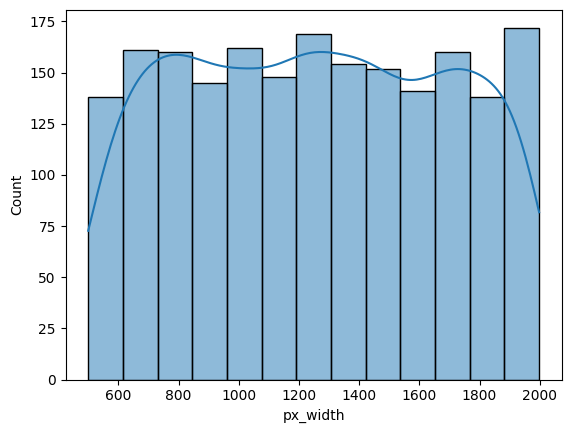

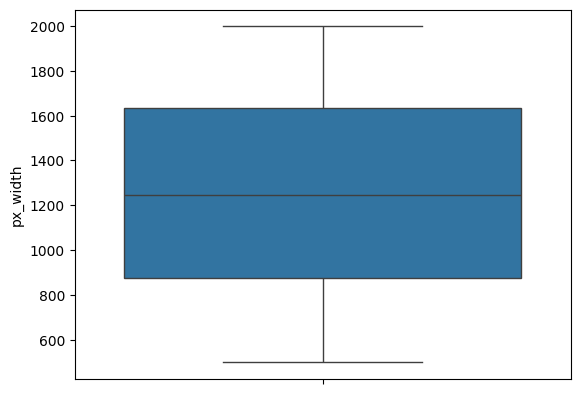

In [24]:
univariate_num(df, x="px_width")

### Bivariate Analysis

Let's see data group by price range.

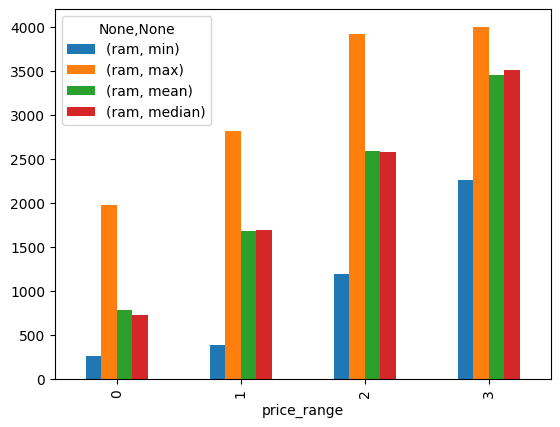

In [25]:
df.groupby(["price_range"]).agg({"ram":["min","max","mean","median"]}).plot(kind="bar")
plt.show()

This shows relation between "ram" and "price_range"

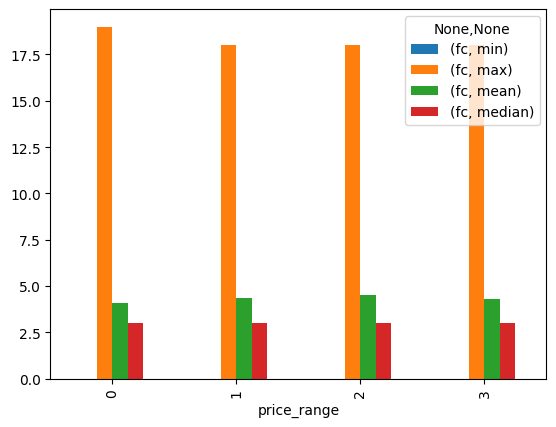

In [26]:
df.groupby(["price_range"]).agg({"fc":["min","max","mean","median"]}).plot(kind="bar")
plt.show()

the relation between "fc" and "price_range"

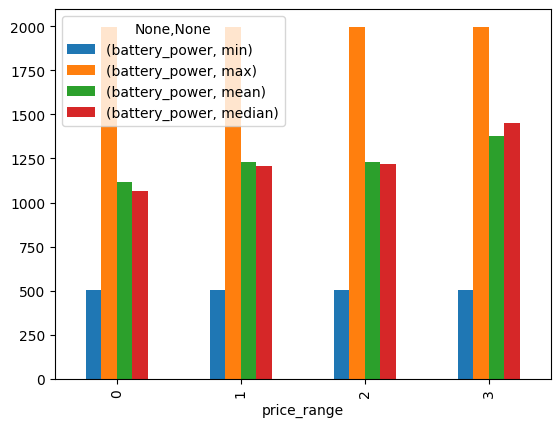

In [27]:
df.groupby(["price_range"]).agg({"battery_power":["min","max","mean","median"]}).plot(kind="bar")
plt.show()

In [28]:
len(df.columns)

21

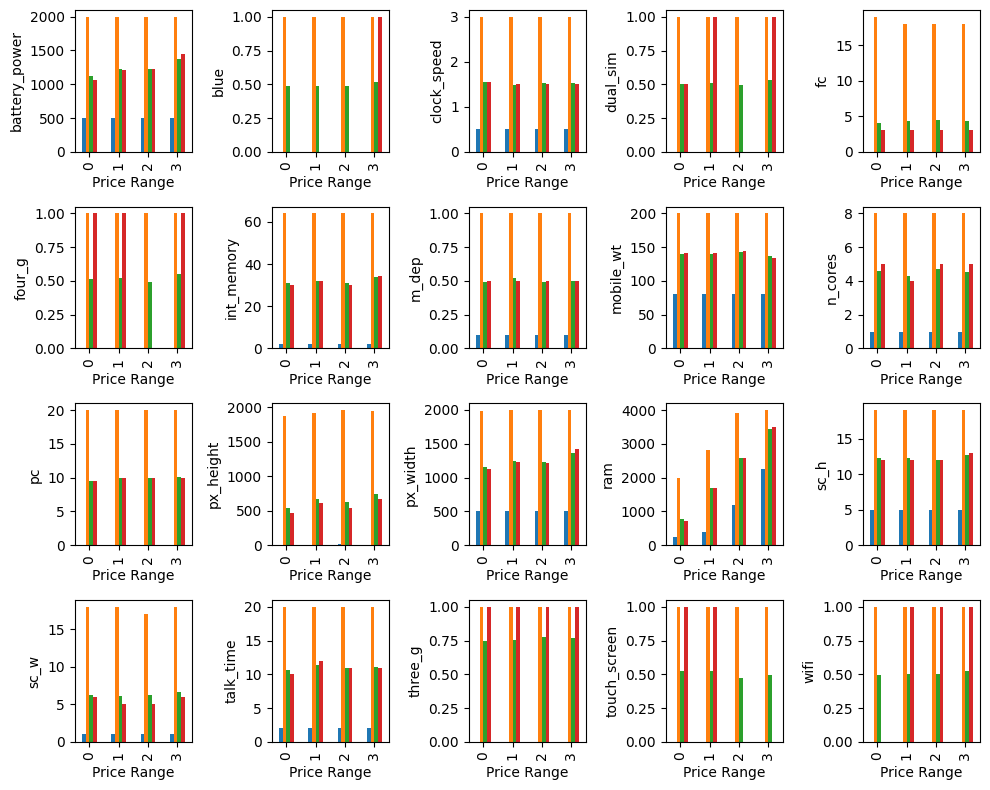

In [29]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.flatten()

col = df.columns
col=col.drop("price_range")

for idx, i in enumerate(col):

    agg_df = df.groupby(["price_range"]).agg({f"{i}":["min","max","mean","median"]})

    agg_df.plot(kind="bar", ax=axes[idx], legend=False)
    #axes[idx].set_title(f"{i}")
    axes[idx].set_ylabel(f"{i}")
    axes[idx].set_xlabel("Price Range")

plt.tight_layout()
plt.show()

According to this Bivariate Analysis, most of the features of phones are similar, the major variation is in "ram"

<Axes: xlabel='price_range', ylabel='ram'>

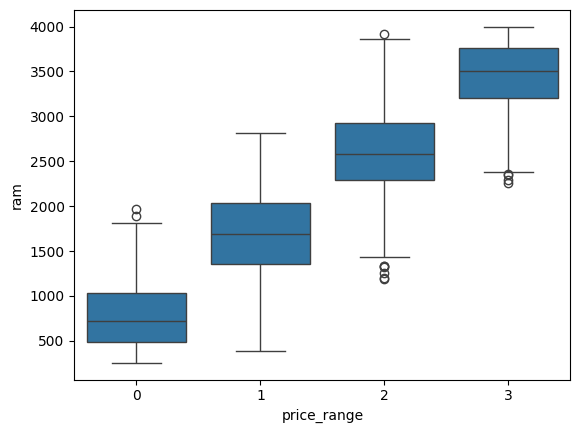

In [30]:
sns.boxplot(x=df['price_range'],y=df['ram'])

As we can see here, there is a positive correlation between "ram" and "price_range"

<Axes: xlabel='price_range', ylabel='fc'>

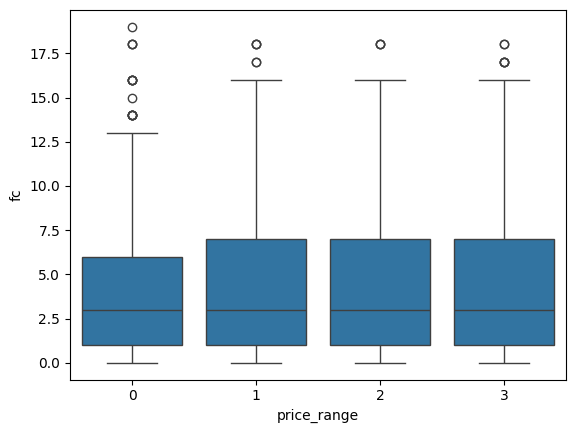

In [31]:
sns.boxplot(x=df['price_range'],y=df['fc'])

Many other factors are not very variated.

## Missing Value Treatment

In [32]:
df.isnull().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

Now, we have to treat the missing values in "sc_w" and "px_height".
I am going to replace these values values with the median of the data.

In [33]:
df["sc_w"].fillna(df["sc_w"].median(),inplace=True)
df["px_height"].fillna(df["px_height"].median(),inplace=True)

In [34]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Outliers Treatment
I am going to use the IQR method to find outliers

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

print("Outliers:")
print(outliers.count())

Outliers:
battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          477
touch_screen       0
wifi               0
price_range        0
dtype: int64


The "three_g" is categorical column, so outliers doesn't affect it.
Some other outliers are very less in ratio. So, it is not needed to be treated.

## Multicollinearty check
Now, let's check multicollinearty by creating a correalation matrix.

In [37]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.015285,-0.008402,-0.000653,-0.029959,-0.021437,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006867,-0.041533,0.026351,-0.002952,-0.023715,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.013713,-0.009476,0.003443,-0.029078,-0.003754,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.022197,0.014291,0.041072,-0.011949,-0.004251,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009797,-0.005176,0.015099,-0.011014,-0.016695,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.018034,0.007448,0.007313,0.027166,0.031790,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.009675,-0.008335,0.032813,0.037771,0.005827,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.024618,0.023566,-0.009434,-0.025348,-0.011328,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000445,0.000090,-0.002581,-0.033855,-0.035943,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006054,0.024480,0.004868,-0.000315,0.020885,0.013148,-0.014733,0.023774,-0.009964,0.004399


This is a uncomprehensible mess, so let's visualize it.

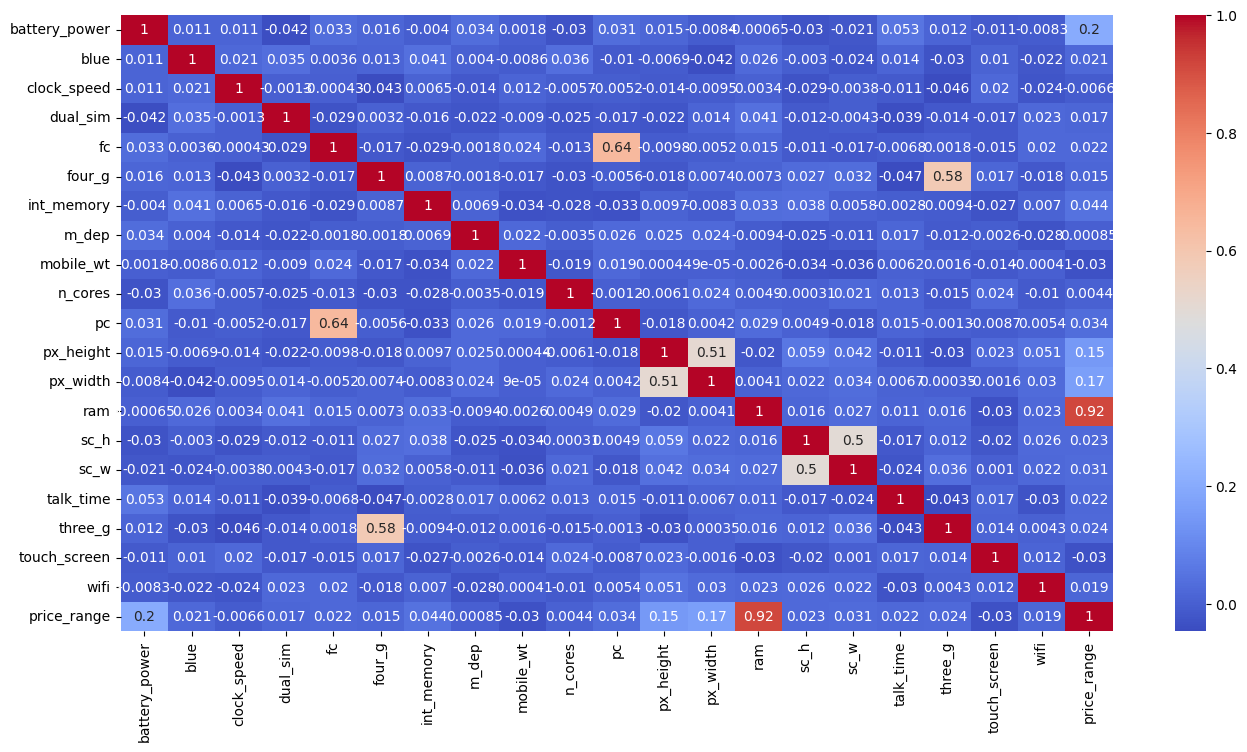

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

The highest correlation is between "ram" and "price_range", and we have seen it earlier.

## Implementing ML Algorithms

We don't have to encode categorical data, because it is already encoded.

### Decision Tree Algorithm

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree

y = df["price_range"]
x = df.drop(["price_range"],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.804

The accuracy of model is very good, **"0.818"**

Now, let's visualize the tree

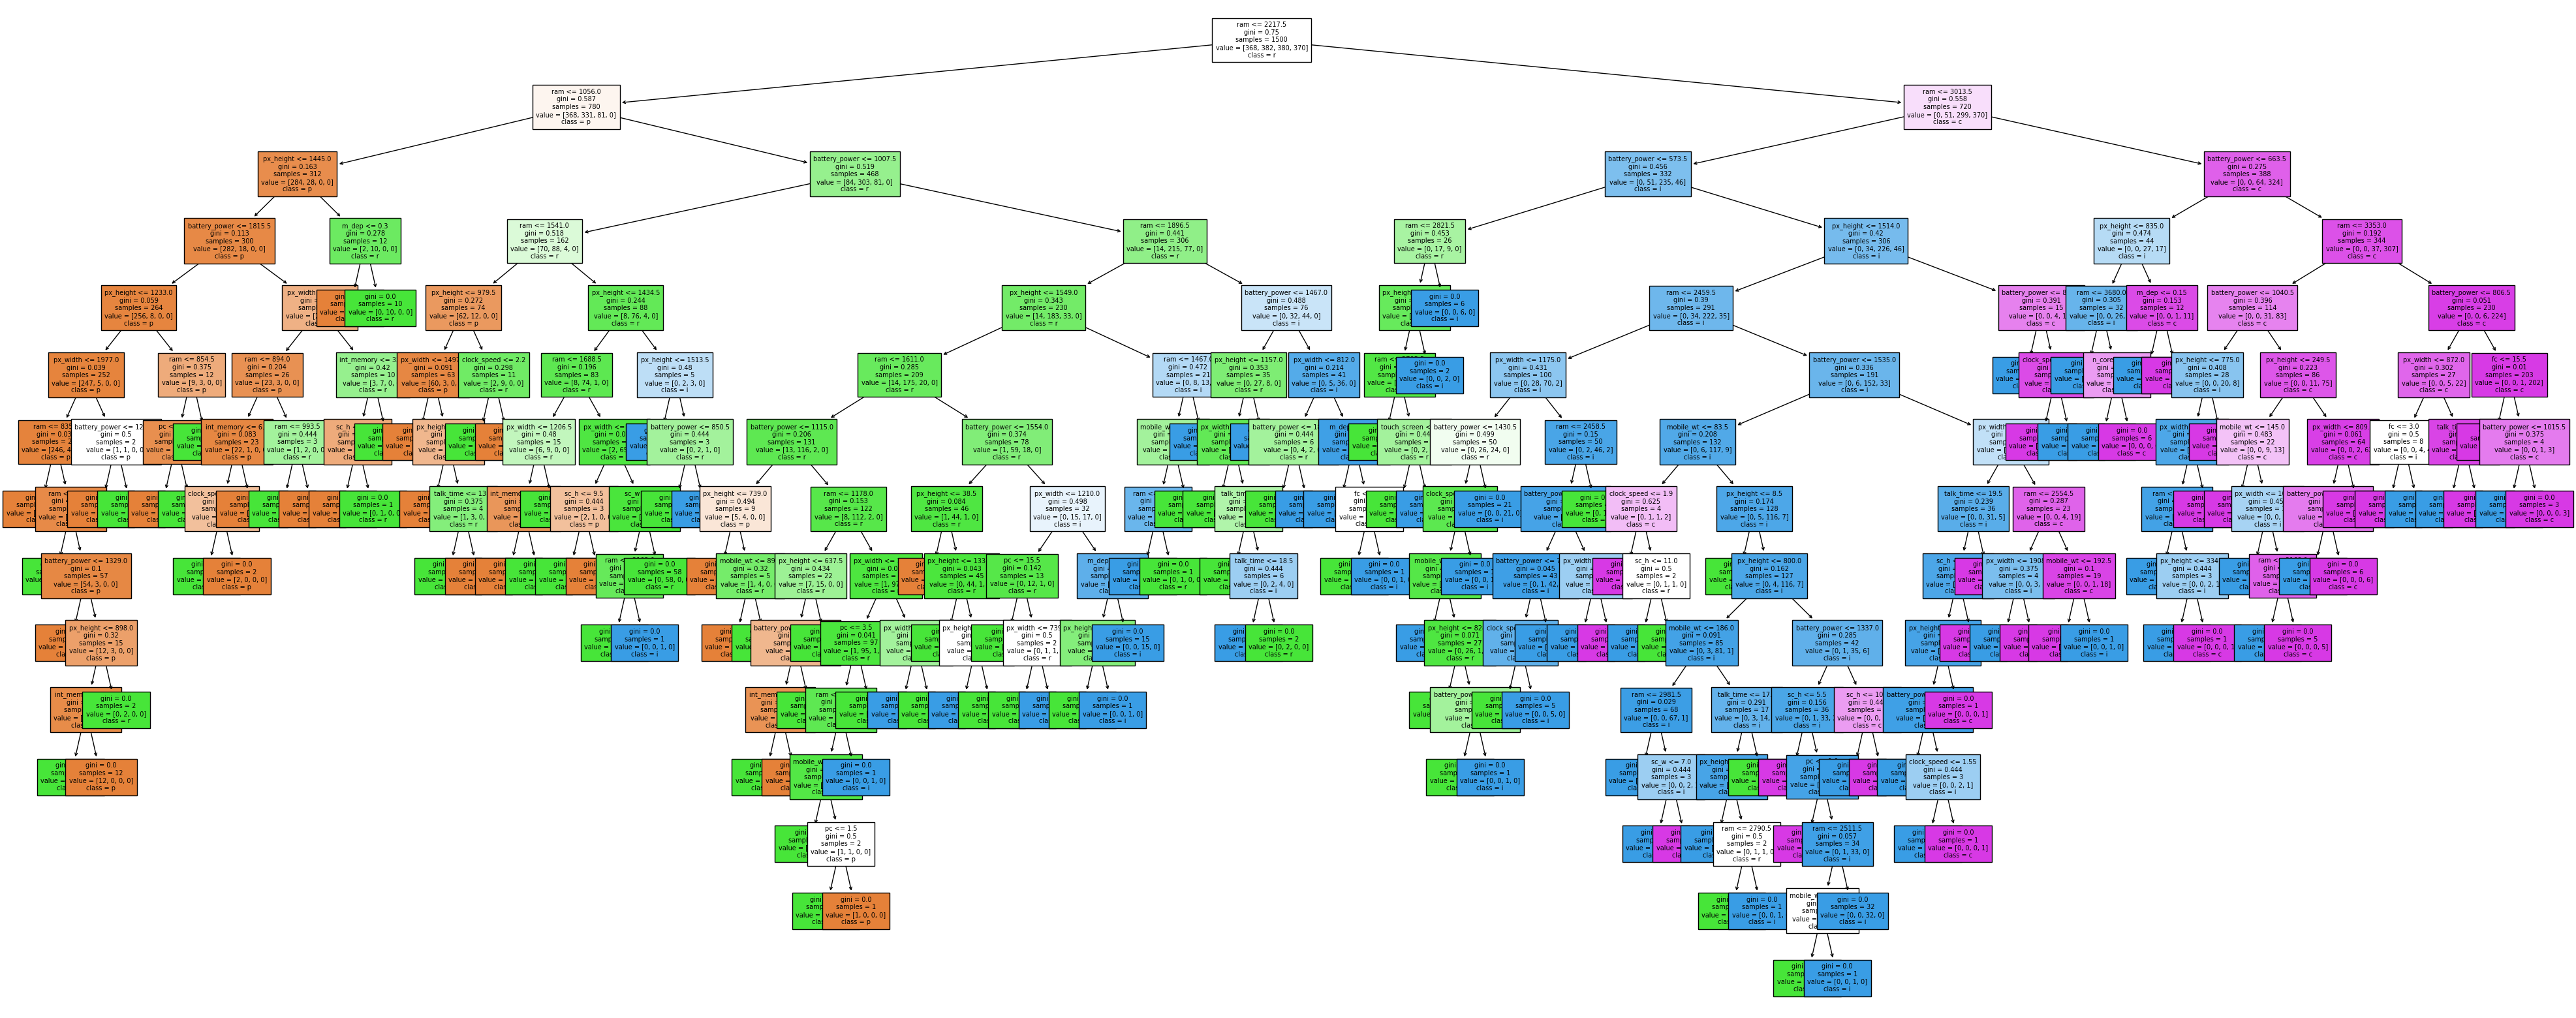

In [40]:
plt.figure(figsize=(50, 20))
plot_tree(dt, feature_names=x.columns, class_names=y.name, filled=True, fontsize=7)
plt.show()

It's not very clear, but it gets the job done.

Saving the model as "decision_tree_mobile.pkl"

In [41]:
import joblib

joblib.dump(dt, "decision_tree_mobile.pkl")

['decision_tree_mobile.pkl']

And then load the model from the file.

In [42]:
loaded_model = joblib.load('decision_tree_mobile.pkl')
predictions = loaded_model.predict(x_test)
(predictions == y_test).sum()/500

0.804

### Naive Bayes Algorithm

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Preprocessing

mms = MinMaxScaler()
mms_fit = mms.fit(x_train)

x_train_mms=mms_fit.transform(x_train)
x_test_mms=mms_fit.transform(x_test)

x_train_mms=pd.DataFrame(x_train_mms,columns=x_train.columns)
x_test_mms=pd.DataFrame(x_test_mms,columns=x_test.columns)

In [54]:
# Model
clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


The accuracy is very similar to Decision Tree Algorithm.

In [67]:
joblib.dump(clf, "gausianNB_mobile.pkl")

['gausianNB_mobile.pkl']

In [68]:
loaded_model = joblib.load('gausianNB_mobile.pkl')
predictions = loaded_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8


### kNN Algorithm

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.932


The kNN algorithm is much better than other two algorithms.
Now, Let's check the accuracy for different values of 'k'.

In [61]:
knn_results={}
for i in range(10):
  knn = KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(x_train,y_train)

  y_pred = knn.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("k-Value:", i+1, "Accuracy:", accuracy)
  knn_results[i+1]=accuracy

knn_results

k-Value: 1 Accuracy: 0.914
k-Value: 2 Accuracy: 0.902
k-Value: 3 Accuracy: 0.916
k-Value: 4 Accuracy: 0.916
k-Value: 5 Accuracy: 0.932
k-Value: 6 Accuracy: 0.938
k-Value: 7 Accuracy: 0.946
k-Value: 8 Accuracy: 0.936
k-Value: 9 Accuracy: 0.948
k-Value: 10 Accuracy: 0.938


{1: 0.914,
 2: 0.902,
 3: 0.916,
 4: 0.916,
 5: 0.932,
 6: 0.938,
 7: 0.946,
 8: 0.936,
 9: 0.948,
 10: 0.938}

In [62]:
max(knn_results, key=lambda k: knn_results[k])

9

The highest accuracy in kNN algorithm is at k-Value "9"

In [69]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

joblib.dump(knn, "knn_mobile.pkl")

['knn_mobile.pkl']

In [70]:
loaded_model = joblib.load('knn_mobile.pkl')
predictions = loaded_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.948


## Final Comparison

In [73]:
decision_tree_model = joblib.load("decision_tree_mobile.pkl")
gausianNB_model = joblib.load("gausianNB_mobile.pkl")
knn_model = joblib.load("knn_mobile.pkl")

results = {}

results["decision_tree"] = accuracy_score(y_test,decision_tree_model.predict(x_test))
results["gausianNB"] = accuracy_score(y_test,gausianNB_model.predict(x_test))
results["knn"] = accuracy_score(y_test,knn_model.predict(x_test))

print(results)

{'decision_tree': 0.804, 'gausianNB': 0.8, 'knn': 0.948}


So, in conclusion, the kNN Algorithm is most effective for predicting price of Mobile phone in this dataset.